# Daksh Khetarpaul
# Programming Exercise \#2
---

# Preamble

In [2]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [3]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [4]:
iot_ds = pd.read_csv('iot_telemetry_dataset.csv')

### (a)

It's an Unsupervised task as there isn't any column stating person detected or not.

### (b)

In [5]:
rows, columns = iot_ds.shape

print(f"Number of samples: {rows}")

Number of samples: 405184


### (c)



In [6]:
mac_address = '00:0f:00:70:91:0a'
filtered_data = iot_ds[iot_ds['device'] == mac_address]


num_samples = filtered_data.shape[0]
print(f"Number of samples associated with the device {mac_address}: {num_samples}")

Number of samples associated with the device 00:0f:00:70:91:0a: 111815



### (d)

In [7]:
mac_address = '1c:bf:ce:15:ec:4d'
filtered_data = iot_ds[iot_ds['device'] == mac_address]


num_samples = filtered_data.shape[0]
print(f"Number of samples associated with the device {mac_address}: {num_samples}")

Number of samples associated with the device 1c:bf:ce:15:ec:4d: 105918


### (e)

In [8]:
mac_address = 'b8:27:eb:bf:9d:51'
filtered_data = iot_ds[iot_ds['device'] == mac_address]


num_samples = filtered_data.shape[0]
print(f"Number of samples associated with the device {mac_address}: {num_samples}")

Number of samples associated with the device b8:27:eb:bf:9d:51: 187451


## Problem 1.2

### (a)

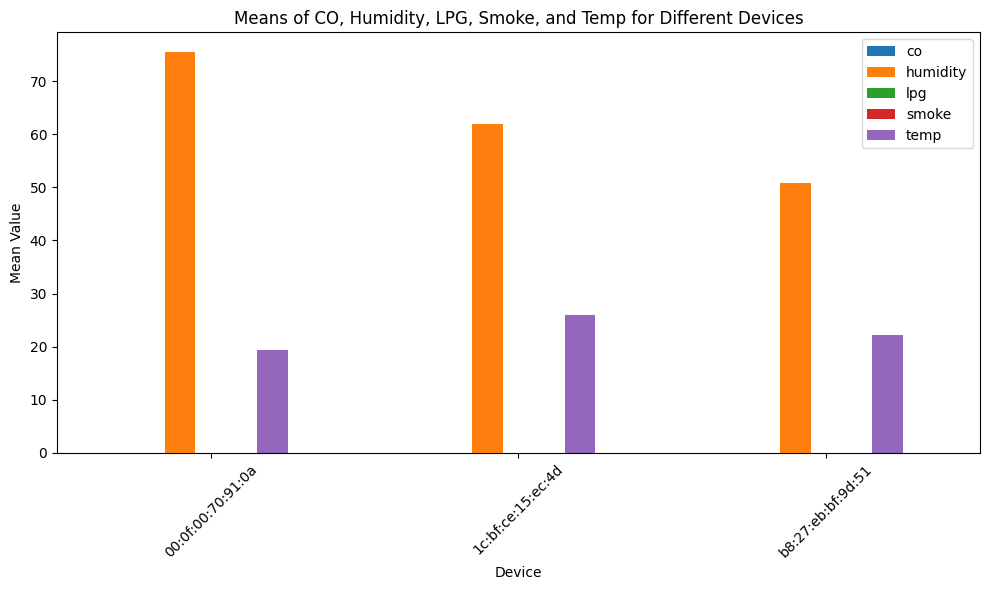

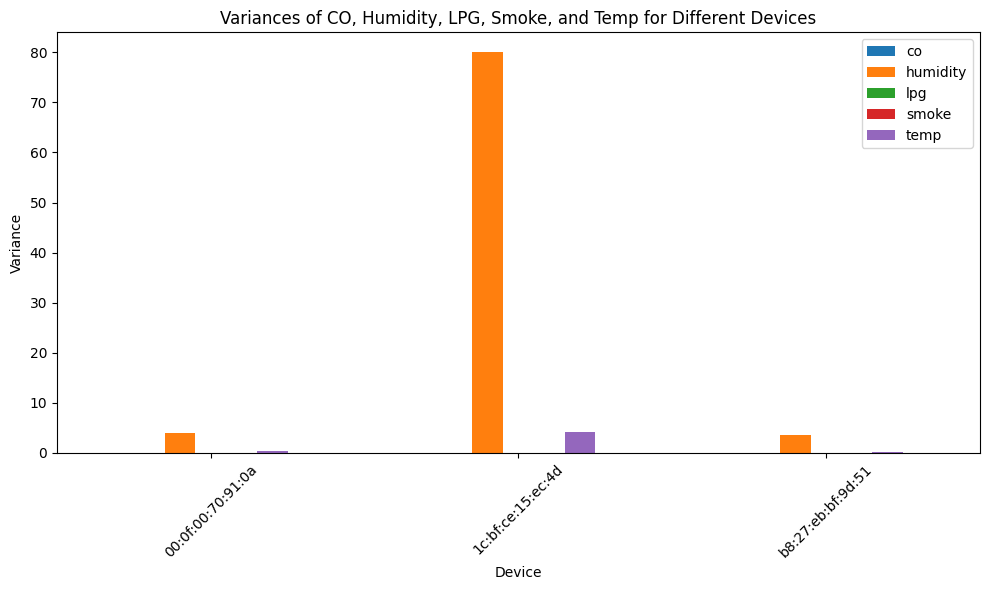

In [9]:
devices = ['1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a']
filtered_data = iot_ds[iot_ds['device'].isin(devices)]


variables = ['co', 'humidity', 'lpg', 'smoke', 'temp']


means = filtered_data.groupby('device')[variables].mean()
variances = filtered_data.groupby('device')[variables].var()



fig, ax = plt.subplots(figsize=(10, 6))
means.plot(kind='bar', ax=ax)
plt.title('Means of CO, Humidity, LPG, Smoke, and Temp for Different Devices')
plt.ylabel('Mean Value')
plt.xlabel('Device')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
variances.plot(kind='bar', ax=ax)
plt.title('Variances of CO, Humidity, LPG, Smoke, and Temp for Different Devices')
plt.ylabel('Variance')
plt.xlabel('Device')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The variables other than temperature and humidity are not visible on the graph because magnitude of their values are very small compared with temperature and humidity

### (b)

In [10]:
iot_ds = pd.read_csv('iot_telemetry_dataset.csv')



# Standardize the dataset within each device group
for var in variables:
    iot_ds[var] = iot_ds.groupby('device')[var].transform(lambda x: (x - x.mean()) / x.std())


print(iot_ds.head(20))

              ts             device        co  humidity  light       lpg  \
0   1.594512e+09  b8:27:eb:bf:9d:51 -1.080793  0.098428  False -1.093491   
1   1.594512e+09  00:0f:00:70:91:0a -0.464451  0.281222  False -0.458333   
2   1.594512e+09  b8:27:eb:bf:9d:51 -1.044864  0.045488  False -1.056107   
3   1.594512e+09  1c:bf:ce:15:ec:4d  0.687051  1.664629   True  0.696248   
4   1.594512e+09  b8:27:eb:bf:9d:51 -1.060344  0.045488  False -1.072209   
5   1.594512e+09  1c:bf:ce:15:ec:4d  0.649527  1.787605   True  0.659043   
6   1.594512e+09  b8:27:eb:bf:9d:51 -1.044841  0.045488  False -1.056083   
7   1.594512e+09  00:0f:00:70:91:0a -0.398156  0.281222  False -0.383561   
8   1.594512e+09  1c:bf:ce:15:ec:4d  0.507419  1.787605   True  0.517887   
9   1.594512e+09  b8:27:eb:bf:9d:51 -1.055167  0.045488  False -1.066824   
10  1.594512e+09  b8:27:eb:bf:9d:51 -1.073150  0.045488  False -1.085536   
11  1.594512e+09  1c:bf:ce:15:ec:4d  0.624684  1.798784   True  0.634395   
12  1.594512


### (c)

In [11]:
categorical_vars = ['device', 'light', 'motion']

# Apply one-hot encoding using pd.get_dummies()
iot_ds_encoded = pd.get_dummies(iot_ds, columns=categorical_vars, dtype=int)




### (d)

In [12]:

print(iot_ds_encoded.head(20))

              ts        co  humidity       lpg     smoke      temp  \
0   1.594512e+09 -1.080793  0.098428 -1.093491 -1.091260  0.871610   
1   1.594512e+09 -0.464451  0.281222 -0.458333 -0.460392  0.524162   
2   1.594512e+09 -1.044864  0.045488 -1.056107 -1.054137  0.664099   
3   1.594512e+09  0.687051  1.664629  0.696248  0.694633  0.480890   
4   1.594512e+09 -1.060344  0.045488 -1.072209 -1.070127  0.664099   
5   1.594512e+09  0.649527  1.787605  0.659043  0.657370  0.480890   
6   1.594512e+09 -1.044841  0.045488 -1.056083 -1.054113  0.664099   
7   1.594512e+09 -0.398156  0.281222 -0.383561 -0.387058  0.524162   
8   1.594512e+09  0.507419  1.787605  0.517887  0.516039  0.480890   
9   1.594512e+09 -1.055167  0.045488 -1.066824 -1.064779  0.664099   
10  1.594512e+09 -1.073150  0.045488 -1.085536 -1.083360  0.664099   
11  1.594512e+09  0.624684  1.798784  0.634395  0.632686  0.480890   
12  1.594512e+09 -1.052681  0.045488 -1.064237 -1.062210  0.664099   
13  1.594512e+09  0.

### (e)

The reason is because ts is the time stamp of the reading and does not help in predicting the output itself, it can be use to find the difference in time in motions to predict wether a human was detected.

## Problem 1.3

In [13]:

variables = ['co', 'humidity', 'lpg', 'smoke', 'temp']


iot_ds['mean'] = iot_ds[variables].mean(axis=1)


iot_ds['geometric_mean'] = iot_ds[variables].abs().apply(sps.gmean, axis=1)


iot_ds['harmonic_mean'] = iot_ds[variables].abs().apply(sps.hmean, axis=1)


iot_ds['variance'] = iot_ds[variables].var(axis=1)


iot_ds['kurtosis'] = iot_ds[variables].apply(sps.kurtosis, axis=1)


iot_ds['skewness'] = iot_ds[variables].apply(sps.skew, axis=1)

print(iot_ds[['mean', 'geometric_mean', 'harmonic_mean', 'variance', 'kurtosis', 'skewness']].head(40))


        mean  geometric_mean  harmonic_mean  variance  kurtosis  skewness
0  -0.459101        0.643851       0.355540  0.817552 -1.268521  0.673607
1  -0.115558        0.428502       0.417687  0.231202 -1.626008  0.504156
2  -0.489104        0.511869       0.189809  0.641322 -1.365727  0.626984
3   0.844690        0.767316       0.713105  0.218513  0.083334  1.347752
4  -0.498619        0.516485       0.190115  0.654782 -1.374738  0.622674
5   0.846887        0.752883       0.692806  0.282264  0.157954  1.420887
6  -0.489090        0.511862       0.189809  0.641303 -1.365713  0.626990
7  -0.072678        0.387290       0.379765  0.195721 -1.589427  0.520788
8   0.761968        0.650609       0.589734  0.328947  0.246717  1.497492
9  -0.495437        0.514944       0.190014  0.650264 -1.371752  0.624102
10 -0.506492        0.520285       0.190362  0.666034 -1.382010  0.619199
11  0.834288        0.736625       0.676308  0.294919  0.183826  1.444486
12 -0.493908        0.514203       0.1

# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [14]:
n_values = np.arange(1, 10001)  
empirical_averages = []  


for n in n_values:
    rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=n)  
    empirical_average = np.mean(rolls)  
    empirical_averages.append(empirical_average)

### (b)

In [15]:
expected_value = 3.5  # Expected value for a fair six-sided die
absolute_discrepancies = np.abs(np.array(empirical_averages) - expected_value)


### (c)



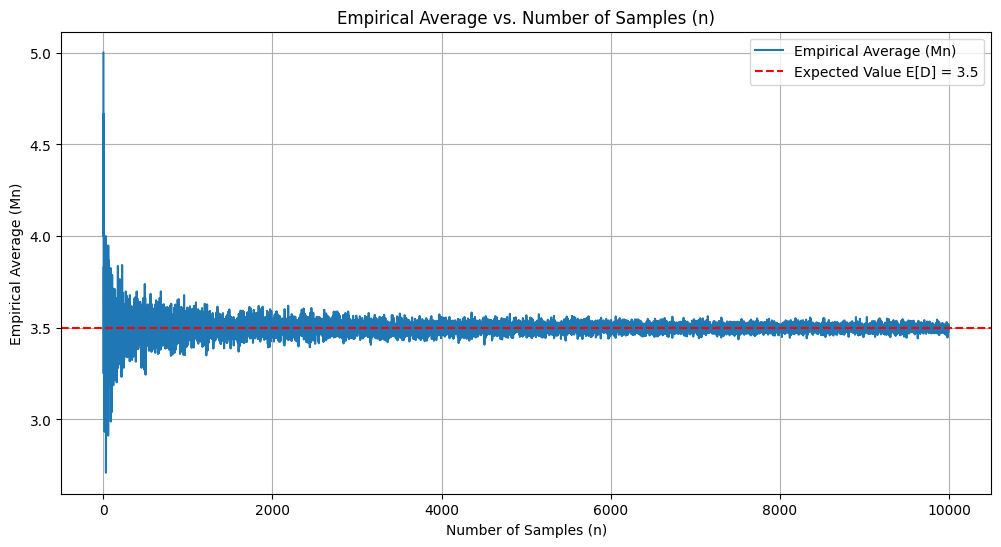

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(n_values, empirical_averages, label='Empirical Average (Mn)')
plt.axhline(y=expected_value, color='r', linestyle='--', label='Expected Value E[D] = 3.5')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Empirical Average (Mn)')
plt.title('Empirical Average vs. Number of Samples (n)')
plt.legend()
plt.grid(True)
plt.show()

As the number of samples increases, empirical average converges to expected value which in this case is 3.5

### (d)

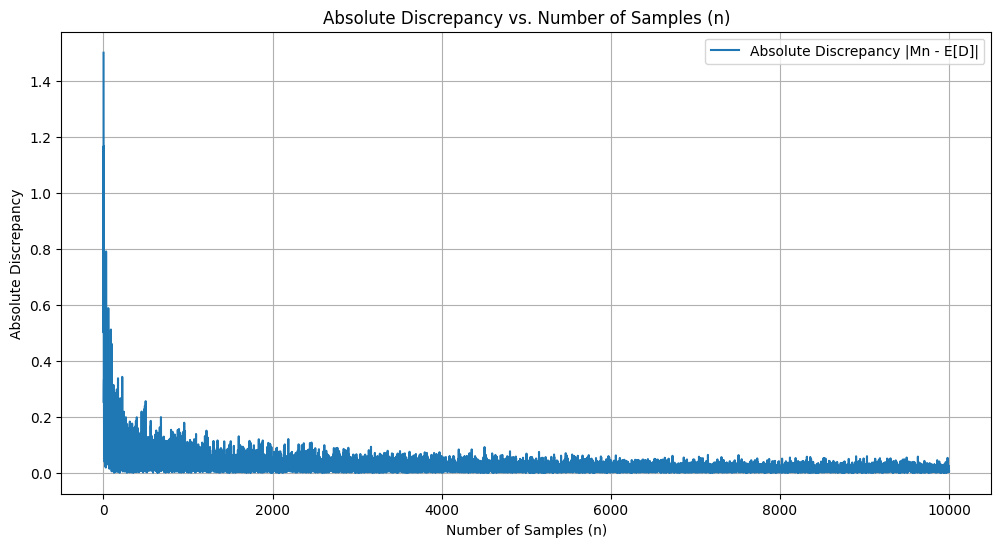

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(n_values, absolute_discrepancies, label='Absolute Discrepancy |Mn - E[D]|')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Absolute Discrepancy')
plt.title('Absolute Discrepancy vs. Number of Samples (n)')
plt.legend()
plt.grid(True)
plt.show()

The graph demonstrates that as the numbers of samples decreases, the absolute discrepency decreases. This supports law of large numbers as empirical average will converge to the expected value as the sample size increases.

## Problem 2.2

### (a)

In [18]:
outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]


expected_value_unfair = np.sum(np.array(outcomes) * np.array(probabilities))
print(f"Expected Value E[D] for the unfair die: {expected_value_unfair}")


n_values = np.arange(1, 10001)  # Range from 1 to 10,000
empirical_averages_unfair = []

for n in n_values:
    rolls = np.random.choice(outcomes, size=n, p=probabilities)  # Unfair die rolls
    empirical_average = np.mean(rolls)  # Compute empirical average
    empirical_averages_unfair.append(empirical_average)

Expected Value E[D] for the unfair die: 4.5


### (b)

In [19]:
absolute_discrepancies_unfair = np.abs(np.array(empirical_averages_unfair) - expected_value_unfair)

### (c)

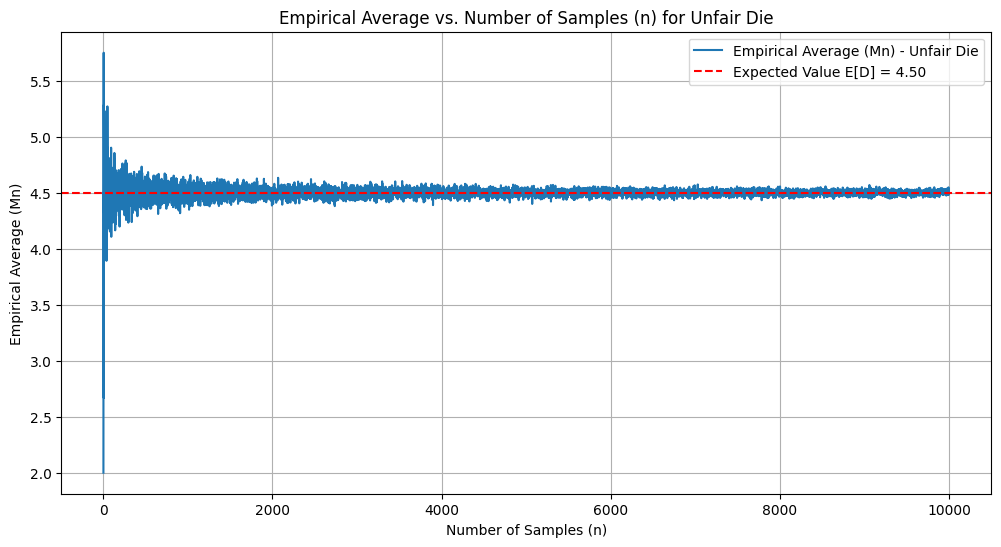

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(n_values, empirical_averages_unfair, label='Empirical Average (Mn) - Unfair Die')
plt.axhline(y=expected_value_unfair, color='r', linestyle='--', label=f'Expected Value E[D] = {expected_value_unfair:.2f}')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Empirical Average (Mn)')
plt.title('Empirical Average vs. Number of Samples (n) for Unfair Die')
plt.legend()
plt.grid(True)
plt.show()

As the number of samples increases, empirical average converges to expected value which in this case is 4.5. The behaviour of graph suggests that even for an unfair die, the empirical average will converge to the true expected value over time with sufficiently large samples.

### (d)

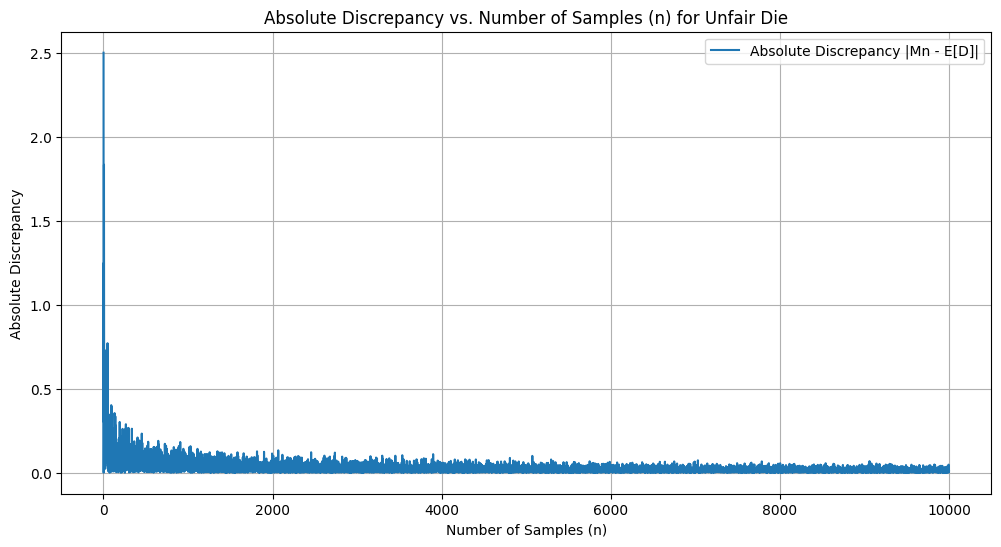

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(n_values, absolute_discrepancies_unfair, label='Absolute Discrepancy |Mn - E[D]|')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Absolute Discrepancy')
plt.title('Absolute Discrepancy vs. Number of Samples (n) for Unfair Die')
plt.legend()
plt.grid(True)
plt.show()

The graph demonstrates that as the numbers of samples decreases, the absolute discrepency decreases. This supports law of large numbers as empirical average will converge to the expected value as the sample size increases. The bias in the die influences the early part of the graph, causing large discrepancies for small sample sizes. However, with more samples, the empirical average converges to expected value, and the discrepancy stabilizes near zero.